In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("../data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
# setting axes parameter settings
axes_settings = {"spines.top":False,
                "spines.right":False,
                }

plt.rc("axes", **axes_settings)

### Data Prep

In [5]:
# Creating a "brazil_vs_others" DataFrame and a "rest_of_world" column using .assign
brazil_vs_others = (coffee_production
                   .assign(rest_of_world = coffee_production
                          .drop("Brazil", axis=1)# drop the Brazil data from the column
                           .sum(axis=1)) # summ up the columns
                   .loc[:,["Brazil", "rest_of_world"]] #grabbing the columns
                   .astype({"Brazil": "float64"})
                   )

brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [6]:
# to create rest of world column(could also use assign, like above) 
coffee_production["Rest of World"] = coffee_production.drop(["Brazil",
                                                            "Viet Nam",
                                                            "Colombia",
                                                            "Indonesia",
                                                            "Ethiopia",], axis=1).sum(axis=1)
# make a series to hold top 5 and rest of world and grab the row for 2018 
coffee_production_top5_2018=coffee_production.loc['2018', ["Brazil",
                                                          "Viet Nam",
                                                           "Colombia",
                                                           "Indonesia",
                                                           "Ethiopia",
                                                           "Rest of World"]
                                                 ]


# to create dataframe
pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


### Meshgrid Layout

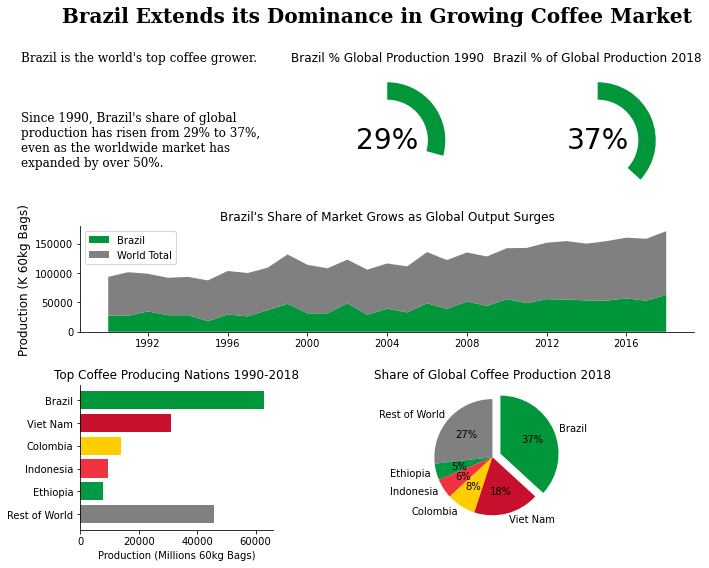

In [9]:
from matplotlib.gridspec import GridSpec
# set the figure
fig = plt.figure(constrained_layout = True)

#main title
fig.suptitle("Brazil Extends it's Dominance in the Growing Coffee Market", fontsize=20)

#set up the grid
grid = GridSpec(10,10, figure=fig)

#set colors
colors=["#009639","#C8102E", "#FFCD00", "#EF3340", "#009A44", "grey"]




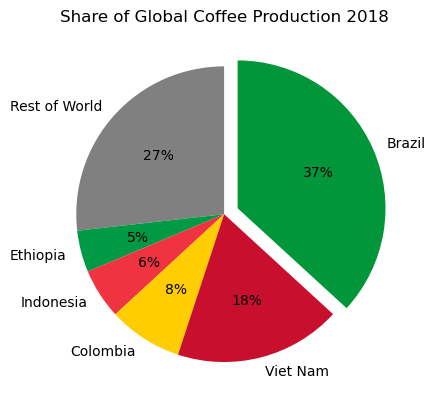

In [18]:
#set colors
colors=["#009639","#C8102E", "#FFCD00", "#EF3340", "#009A44", "grey"]
# pie chart,needs section exploded and colors
fig,ax=plt.subplots()

ax.pie(x=coffee_production_top5_2018[::-1],
      startangle=90,
      labels=["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia", "Rest of World"][::-1],
      autopct="%.0f%%",
       colors=colors[::-1],
       explode=(0,0,0,0,0,.1)
      )
ax.set_title("Share of Global Coffee Production 2018");

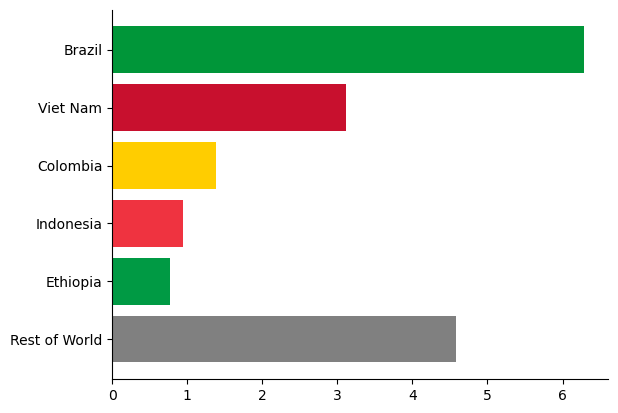

In [39]:
fig,ax = plt.subplots()

# select data
ax.barh(coffee_production_top5_2018.index,
       (coffee_production_top5_2018/10000),
      color=colors)
#revers the order of the bars
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Brazil Share of Global Production 1990')

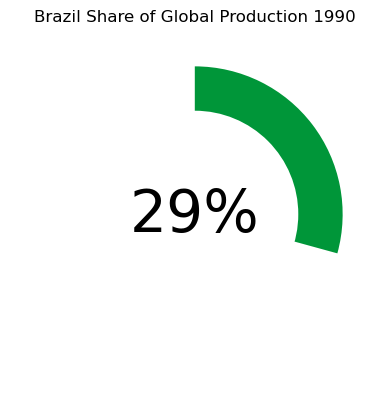

In [20]:
# donut for 1990
fig, ax = plt.subplots()
# Pull 1990 data (first row) using .iloc, then sort the values
ax.pie(brazil_vs_others.iloc[0].sort_values(ascending = False),
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
       pctdistance=.85,
      colors=["white","#009639"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,f"{round((brazil_vs_others.loc['1990','Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
        ha="center",
        va="center",
        fontsize=42
         
)

ax.set_title("Brazil Share of Global Production 1990", fontsize=12)

Text(0.5, 1.0, 'Brazil Share of Global Production 2018')

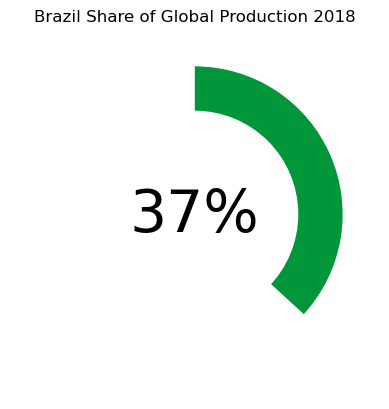

In [21]:
# donut for 2018
fig, ax = plt.subplots()

# Pull 2018 data (Last row) using .iloc, then sort the values
ax.pie(brazil_vs_others.iloc[-1].sort_values(ascending = False),
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
#       pctdistance=.85,
      colors=["white","#009639"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,
        f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%",
        ha="center",
        va="center",
        fontsize=42
)

ax.set_title("Brazil Share of Global Production 2018", fontsize=12)

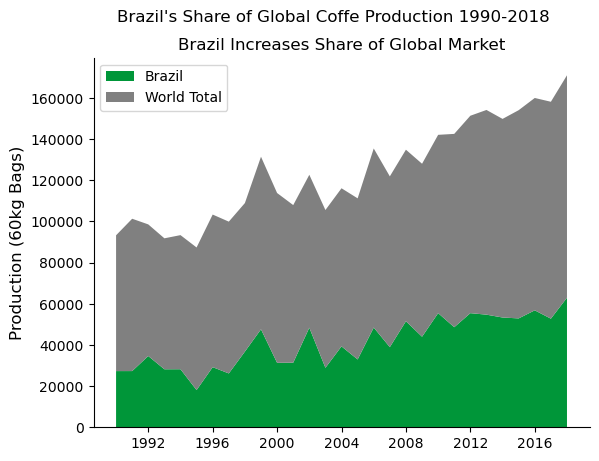

In [22]:
# Stacked line chart
fig, ax = plt.subplots()

labels=["Brazil", "World Total"]
color=["#009639", "grey"]

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), #must cast as datetime64 for clear x axis titles
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=labels,
    colors=color
)

# set figure title, plot title, and y axis label
fig.suptitle("Brazil's Share of Global Coffe Production 1990-2018")
ax.set_title("Brazil Increases Share of Global Market")
ax.set_ylabel("Production (60kg Bags)", fontsize=12)

#removing spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# call legend and set placement
ax.legend(loc="upper left")

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [19]:
prices_paid_to_growers = pd.read_csv("coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [23]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


(array([5., 4., 3., 4., 4., 6., 0., 2., 0., 1.]),
 array([0.63767231, 0.9229374 , 1.2082025 , 1.4934676 , 1.7787327 ,
        2.06399779, 2.34926289, 2.63452799, 2.91979308, 3.20505818,
        3.49032328]),
 <BarContainer object of 10 artists>)

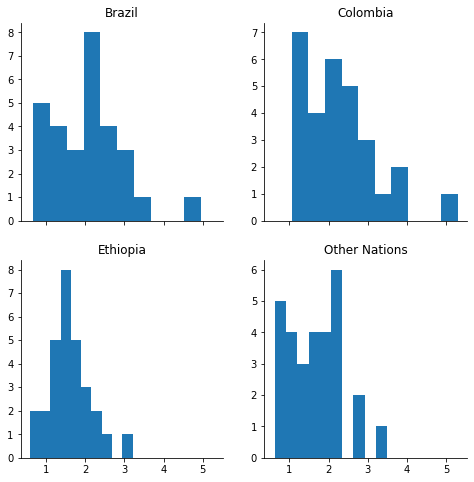